In [2]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import numpy

from bow_tfidf import train_loader, test_loader, data_loader

from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

/common/home/wcc44/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/common/home/wcc44/.local/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning: torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.
  _torch_pytree._register_pytree_node(
/common/home/wcc44/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [3]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)

In [4]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(16235, 10000),
            nn.ReLU(),
            nn.Linear(10000, 1000),
            nn.ReLU(),
            nn.Linear(1000, 500),
            nn.ReLU(),
            nn.Linear(500, 100),
            nn.ReLU(),
            nn.Linear(100, 50),
            nn.ReLU(),
            nn.Linear(50, 50),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

In [5]:
model = NeuralNetwork().to(device)
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=16235, out_features=10000, bias=True)
    (1): ReLU()
    (2): Linear(in_features=10000, out_features=1000, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1000, out_features=500, bias=True)
    (5): ReLU()
    (6): Linear(in_features=500, out_features=100, bias=True)
    (7): ReLU()
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU()
    (10): Linear(in_features=50, out_features=50, bias=True)
  )
)


In [6]:
#NN Model
# Training loop
#model = NeuralNetwork().to(device)

num_epochs = 30

personalities = [
    # Authors
    "William Shakespeare", "Jane Austen", "George Orwell", "J.K. Rowling",
    "Ernest Hemingway", "Mark Twain", "Charles Dickens", "Leo Tolstoy",
    "Agatha Christie", "Virginia Woolf",

    # Politicians
    "Nelson Mandela", "Winston Churchill", "Margaret Thatcher", "Barack Obama",
    "Mahatma Gandhi", "Angela Merkel", "Abraham Lincoln", "John F. Kennedy",
    "Vladimir Putin", "Xi Jinping",

    # Musicians
    "Ludwig van Beethoven", "Wolfgang Amadeus Mozart", "Bob Dylan", "The Beatles",
    "Michael Jackson", "Madonna", "Beyoncé", "David Bowie", "Elvis Presley",
    "Freddie Mercury",

    # Historical Figures
    "Albert Einstein", "Martin Luther King Jr.", "Leonardo da Vinci", "Cleopatra",
    "Julius Caesar", "Joan of Arc", "Galileo Galilei", "Isaac Newton",
    "Napoleon Bonaparte", "Alexander the Great",

    # Actors
    "Marilyn Monroe", "Audrey Hepburn", "Marlon Brando", "Meryl Streep",
    "Leonardo DiCaprio", "Denzel Washington", "Tom Hanks", "Natalie Portman",
    "Brad Pitt", "Angelina Jolie"
]

# Define personalities_to_int dictionary outside the loop
personalities_to_int = {personality: i for i, personality in enumerate(sorted(set(personalities)))}

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, batch in enumerate(train_loader):
        data, labels, vector = batch
        # Encode labels
        numerical_labels = [personalities_to_int[label] for label in labels]
        num_labels = torch.tensor(numerical_labels)

        # Forward pass
        outputs = model(vector.float())
        loss = criterion(outputs, num_labels.long())
        
        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()


        
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader)}")

Epoch [1/30], Loss: 3.8587572704661977
Epoch [2/30], Loss: 3.6314097274433483
Epoch [3/30], Loss: 3.223284357244318
Epoch [4/30], Loss: 2.9256208636543968
Epoch [5/30], Loss: 2.540381266854026
Epoch [6/30], Loss: 2.1844197620045054
Epoch [7/30], Loss: 1.735602045059204
Epoch [8/30], Loss: 1.3705367565155029
Epoch [9/30], Loss: 0.94974445104599
Epoch [10/30], Loss: 0.6820805668830872
Epoch [11/30], Loss: 0.420311795852401
Epoch [12/30], Loss: 0.2991247183897279
Epoch [13/30], Loss: 0.27481524429538035
Epoch [14/30], Loss: 0.22816585261713374
Epoch [15/30], Loss: 0.14902286353436384
Epoch [16/30], Loss: 0.14599045752124354
Epoch [17/30], Loss: 0.12562197651714085
Epoch [18/30], Loss: 0.08914765937423164
Epoch [19/30], Loss: 0.07446386080912569
Epoch [20/30], Loss: 0.06112289304252375
Epoch [21/30], Loss: 0.04040978188965131
Epoch [22/30], Loss: 0.03159860945941711
Epoch [23/30], Loss: 0.03736011469525031
Epoch [24/30], Loss: 0.03481675881723111
Epoch [25/30], Loss: 0.054366889968514444
E

Accuracy: 0.10


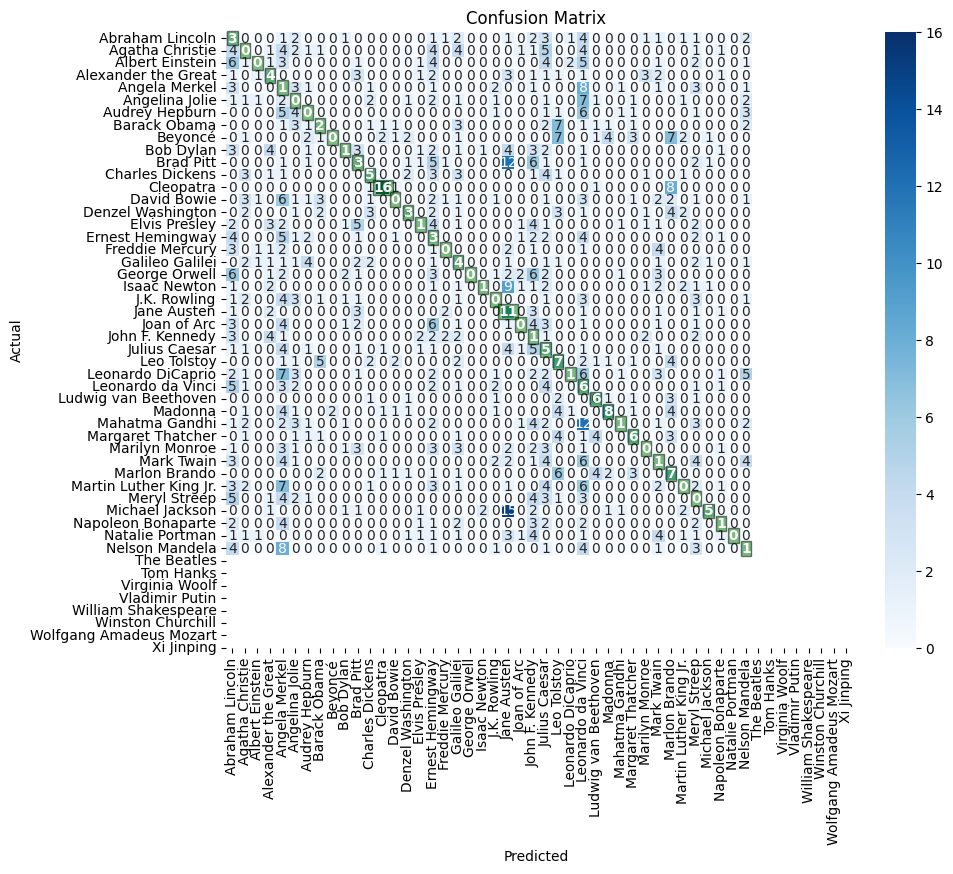

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Set model to evaluation mode
model.eval()

# Lists to store actual and predicted labels
actual_labels = []
predicted_labels = []

# Define the personalities in alphabetical order
personalities = sorted([
    # Authors
    "William Shakespeare", "Jane Austen", "George Orwell", "J.K. Rowling",
    "Ernest Hemingway", "Mark Twain", "Charles Dickens", "Leo Tolstoy",
    "Agatha Christie", "Virginia Woolf",

    # Politicians
    "Nelson Mandela", "Winston Churchill", "Margaret Thatcher", "Barack Obama",
    "Mahatma Gandhi", "Angela Merkel", "Abraham Lincoln", "John F. Kennedy",
    "Vladimir Putin", "Xi Jinping",

    # Musicians
    "Ludwig van Beethoven", "Wolfgang Amadeus Mozart", "Bob Dylan", "The Beatles",
    "Michael Jackson", "Madonna", "Beyoncé", "David Bowie", "Elvis Presley",
    "Freddie Mercury",

    # Historical Figures
    "Albert Einstein", "Martin Luther King Jr.", "Leonardo da Vinci", "Cleopatra",
    "Julius Caesar", "Joan of Arc", "Galileo Galilei", "Isaac Newton",
    "Napoleon Bonaparte", "Alexander the Great",

    # Actors
    "Marilyn Monroe", "Audrey Hepburn", "Marlon Brando", "Meryl Streep",
    "Leonardo DiCaprio", "Denzel Washington", "Tom Hanks", "Natalie Portman",
    "Brad Pitt", "Angelina Jolie"
])

# Define personalities_to_int dictionary outside the loop
personalities_to_int = {personality: i for i, personality in enumerate(personalities)}

# Iterate through the test dataset
for data, labels, vector in test_loader:
    # Forward pass
    outputs = model(vector.float())
    
    # Get predicted labels
    _, predicted = torch.max(outputs, 1)

    # Encode labels
    numerical_labels = [personalities_to_int[label] for label in labels]
    num_labels = torch.tensor(numerical_labels)
    
    # Convert to numpy arrays
    actual_labels.extend(num_labels.numpy())
    predicted_labels.extend(predicted.numpy())

# Ensure actual and predicted labels have the same length
#assert len(actual_labels) == len(predicted_labels)

# Calculate confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Get class labels in alphabetical order
#class_labels = sorted(personalities_to_int.keys())
class_labels = personalities_to_int.keys()

# Calculate accuracy
accuracy = accuracy_score(actual_labels, predicted_labels)

# Output accuracy
print(f"Accuracy: {accuracy:.2f}")

# Plot confusion matrix with highlighting correct predictions on the diagonal
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Highlight correct predictions on the diagonal
for i in range(min(len(class_labels), conf_matrix.shape[0])):
    plt.text(i + 0.5, i + 0.5, f'{conf_matrix[i, i]}', ha='center', va='center', color='white', fontsize=10, fontweight='bold', bbox=dict(facecolor='green', alpha=0.5, pad=0.3))

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

Accuracy: 0.01


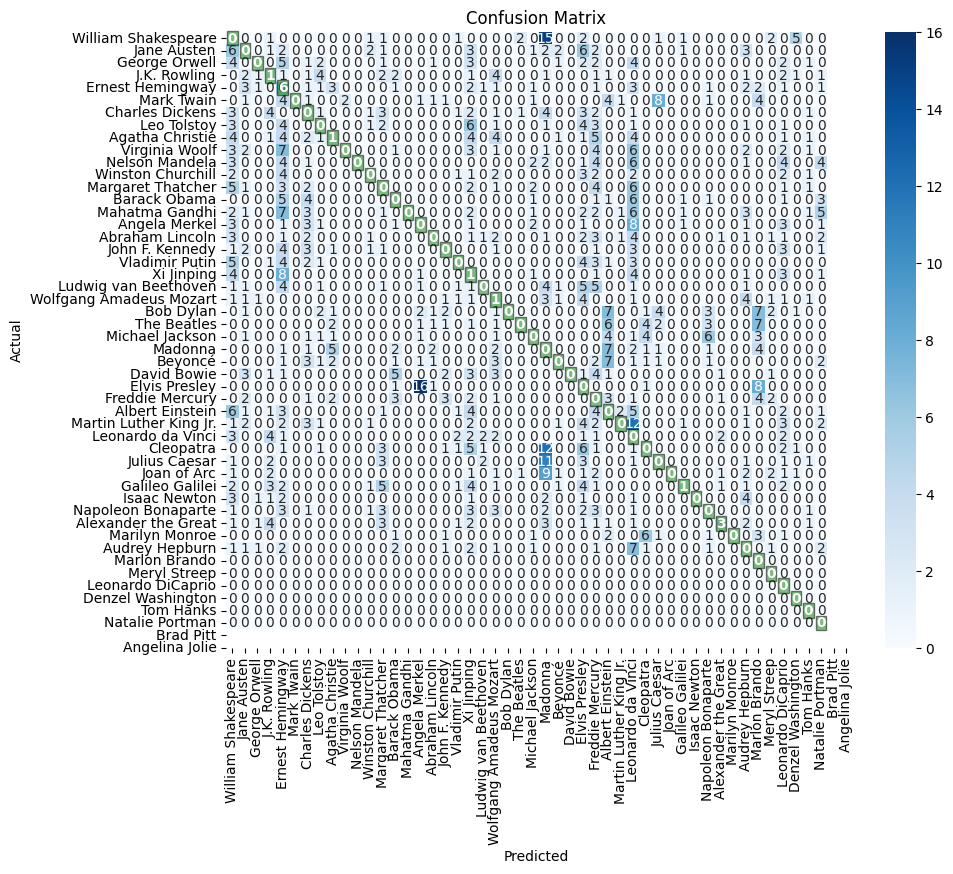

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score

# Set model to evaluation mode
model.eval()

# Lists to store actual and predicted labels
actual_labels = []
predicted_labels = []

personalities = [
    # Authors
    "William Shakespeare", "Jane Austen", "George Orwell", "J.K. Rowling",
    "Ernest Hemingway", "Mark Twain", "Charles Dickens", "Leo Tolstoy",
    "Agatha Christie", "Virginia Woolf",

    # Politicians
    "Nelson Mandela", "Winston Churchill", "Margaret Thatcher", "Barack Obama",
    "Mahatma Gandhi", "Angela Merkel", "Abraham Lincoln", "John F. Kennedy",
    "Vladimir Putin", "Xi Jinping",

    # Musicians
    "Ludwig van Beethoven", "Wolfgang Amadeus Mozart", "Bob Dylan", "The Beatles",
    "Michael Jackson", "Madonna", "Beyoncé", "David Bowie", "Elvis Presley",
    "Freddie Mercury",

    # Historical Figures
    "Albert Einstein", "Martin Luther King Jr.", "Leonardo da Vinci", "Cleopatra",
    "Julius Caesar", "Joan of Arc", "Galileo Galilei", "Isaac Newton",
    "Napoleon Bonaparte", "Alexander the Great",

    # Actors
    "Marilyn Monroe", "Audrey Hepburn", "Marlon Brando", "Meryl Streep",
    "Leonardo DiCaprio", "Denzel Washington", "Tom Hanks", "Natalie Portman",
    "Brad Pitt", "Angelina Jolie"
]

# Define personalities_to_int dictionary outside the loop
personalities_to_int = {personality: i for i, personality in enumerate(personalities)}

# Iterate through the test dataset
for data, labels, vector in test_loader:
    # Forward pass
    outputs = model(vector.float())
    
    # Get predicted labels
    _, predicted = torch.max(outputs, 1)

    # Encode labels
    numerical_labels = [personalities_to_int[label] for label in labels]
    num_labels = torch.tensor(numerical_labels)
    
    # Convert to numpy arrays
    actual_labels.extend(num_labels.numpy())
    predicted_labels.extend(predicted.numpy())

# Ensure actual and predicted labels have the same length
#assert len(actual_labels) == len(predicted_labels)

# Calculate confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels)

# Get class labels
class_labels = list(personalities_to_int.keys())

# Calculate accuracy
accuracy = accuracy_score(actual_labels, predicted_labels)

# Output accuracy
print(f"Accuracy: {accuracy:.2f}")

# Plot confusion matrix with highlighting correct predictions on the diagonal
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_labels, yticklabels=class_labels)

# Highlight correct predictions on the diagonal
for i in range(min(len(class_labels), conf_matrix.shape[0])):
    plt.text(i + 0.5, i + 0.5, f'{conf_matrix[i, i]}', ha='center', va='center', color='white', fontsize=10, fontweight='bold', bbox=dict(facecolor='green', alpha=0.5, pad=0.3))

plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

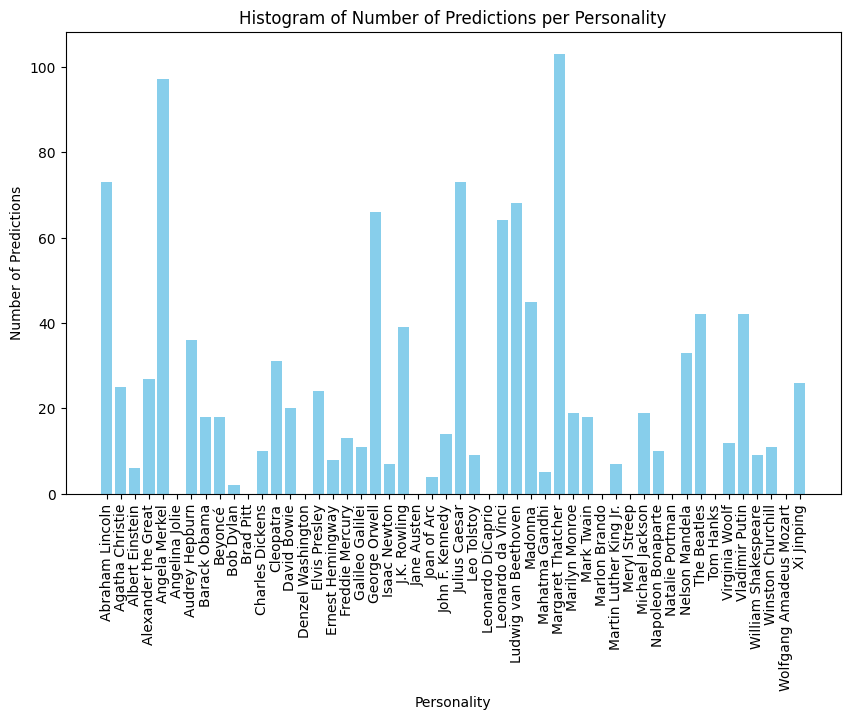

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Convert predicted_labels to a NumPy array
predicted_labels_np = np.array(predicted_labels)

# Count the number of predictions for each personality
predictions_count = {personality: np.sum(predicted_labels_np == personalities_to_int[personality]) for personality in personalities}

# Sort predictions_count by keys (personality names)
sorted_predictions_count = dict(sorted(predictions_count.items()))

# Plot histogram
plt.figure(figsize=(10, 6))
plt.bar(sorted_predictions_count.keys(), sorted_predictions_count.values(), color='skyblue')
plt.xlabel('Personality')
plt.ylabel('Number of Predictions')
plt.title('Histogram of Number of Predictions per Personality')
plt.xticks(rotation=90)
plt.show()

